In [9]:
!pip install seaborn
!pip install numpy
!pip install pandas
!pip install sklearn

In [10]:
!pip install opencv-python

In [11]:
!pip install matplotlib

In [12]:
## COVID19 DETECTION USING CT SCAN BY KARAN PATEL

# IMPORTING LIBRARIES

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import matplotlib.pyplot as plt
from builtins import range, input

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns
import numpy as np


from glob import glob
import pandas as pd
import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer


print("All libraries are imported")

All libraries are imported


In [13]:
#define size to which images are to be resized
IMAGE_SIZE = [250, 250]

# training config:
epochs = 200
batch_size = 32

#define paths
Pneumonia_path = 'D:\Hackthon Pneumonia\CT _Scan\dataset\datasets\datasets\CT_COVID\CT_COVID'
NonPneumonia_path = 'D:\Hackthon Pneumonia\CT _Scan\dataset\datasets\datasets\CT_NonCOVID\CT_NonCOVID'

# Use glob to grab images from path .jpg or jpeg
Pneumonia_files = glob(Pneumonia_path + '/*')
NonPneumonia_files = glob(NonPneumonia_path + '/*')

In [14]:
# Visualize file variable contents
print("First 5 Pneumonia Files: ",Pneumonia_files[0:5])
print("_________________________________________________________________________________________________________________________")
print("Total Count: ",len(Pneumonia_files))
print("_________________________________________________________________________________________________________________________")
print("First 5 NonPneumonia Files: ",NonPneumonia_files[0:5])
print("_________________________________________________________________________________________________________________________")
print("Total Count: ",len(NonPneumonia_files))

First 5 Pneumonia Files:  ['D:\\Hackthon Pneumonia\\CT _Scan\\dataset\\datasets\\datasets\\CT_COVID\\CT_COVID\\2019-novel-Coronavirus-severe-adult-respiratory-dist_2020_International-Jour-p3-89%0.png', 'D:\\Hackthon Pneumonia\\CT _Scan\\dataset\\datasets\\datasets\\CT_COVID\\CT_COVID\\2019-novel-Coronavirus-severe-adult-respiratory-dist_2020_International-Jour-p3-89%1.png', 'D:\\Hackthon Pneumonia\\CT _Scan\\dataset\\datasets\\datasets\\CT_COVID\\CT_COVID\\2019-novel-Coronavirus-severe-adult-respiratory-dist_2020_International-Jour-p3-91.png', 'D:\\Hackthon Pneumonia\\CT _Scan\\dataset\\datasets\\datasets\\CT_COVID\\CT_COVID\\2020.01.24.919183-p27-132.png', 'D:\\Hackthon Pneumonia\\CT _Scan\\dataset\\datasets\\datasets\\CT_COVID\\CT_COVID\\2020.01.24.919183-p27-133.png']
_________________________________________________________________________________________________________________________
Total Count:  357
______________________________________________________________________________

In [17]:
Pneumonia_labels = []                                    # Empty lists for append the labels
NonPneumonia_labels = []

Pneumonia_images=[]                                      # Empty lists for append the images
NonPneumonia_images=[]

for i in range(len(Pneumonia_files)):
  image = cv2.imread(Pneumonia_files[i])                  # reading the file 
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)      # arrange format as per deep learning libraries
  image = cv2.resize(image,(250,250))                 # resize as per model
  Pneumonia_images.append(image)                          # append image
  Pneumonia_labels.append('CT_Pneumonia')                     #append class label
  
for i in range(len(NonPneumonia_files)):
  image = cv2.imread(NonPneumonia_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(250,250))
  NonPneumonia_images.append(image)
  NonPneumonia_labels.append('CT_NonPneumonia')

In [18]:
# define the function for plotting the image

def plot_images_from_datasets(images, title):
    nrows, ncols = 5, 8
    figsize = [10, 6]

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, facecolor=(1, 1, 1))

    for i, axi in enumerate(ax.flat):
        axi.imshow(images[i])
        axi.set_axis_off()

    plt.suptitle(title, fontsize=20)
    plt.tight_layout(pad=0.2, rect=[0, 0, 1, 0.9])
    plt.show()

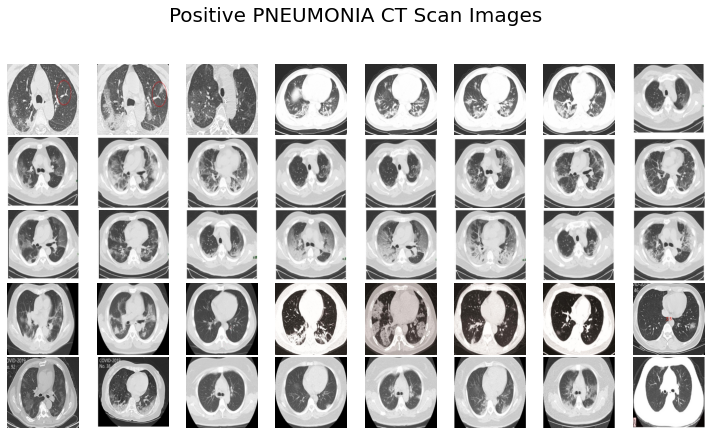

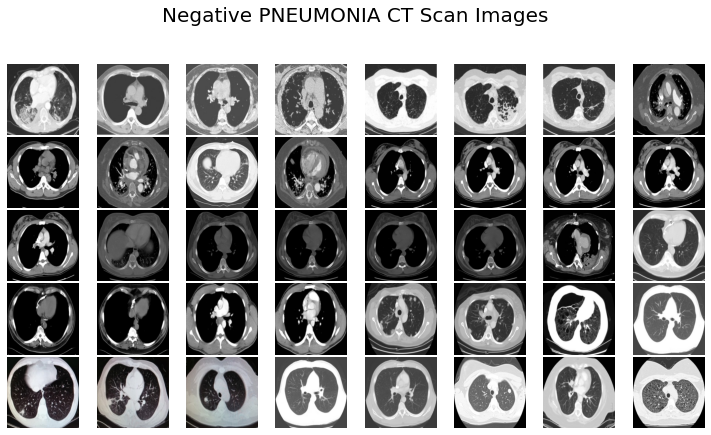

In [19]:
# Plotting the Positive COVID and Negative COVID datasets

plot_images_from_datasets(Pneumonia_images, 'Positive PNEUMONIA CT Scan Images')
plot_images_from_datasets(NonPneumonia_images, 'Negative PNEUMONIA CT Scan Images')

# Convert to array and Normalize to interval
Pneumonia_images = np.array(Pneumonia_images) / 255
NonPneumonia_images = np.array(NonPneumonia_images) / 255

In [21]:
# Split into training and testing sets 

#  PNEUMONIA Positive 
Pneumonia_x_train, Pneumonia_x_test, Pneumonia_y_train, Pneumonia_y_test = train_test_split(
    Pneumonia_images, Pneumonia_labels, test_size=0.2)

#Pneumonia Negative
NonPneumonia_x_train, NonPneumonia_x_test, NonPneumonia_y_train, NonPneumonia_y_test = train_test_split(
    NonPneumonia_images, NonPneumonia_labels, test_size=0.2)

# Merge sets for both types of images
X_train = np.concatenate((NonPneumonia_x_train, Pneumonia_x_train), axis=0)
X_test = np.concatenate((NonPneumonia_x_test, Pneumonia_x_test), axis=0)
y_train = np.concatenate((NonPneumonia_y_train, Pneumonia_y_train), axis=0)
y_test = np.concatenate((NonPneumonia_y_test, Pneumonia_y_test), axis=0)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


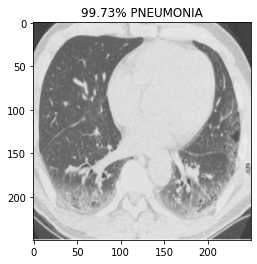

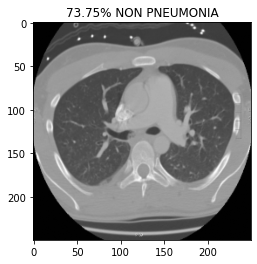

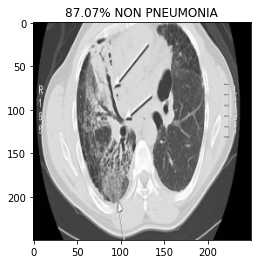

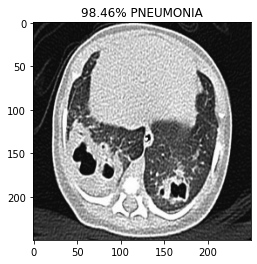

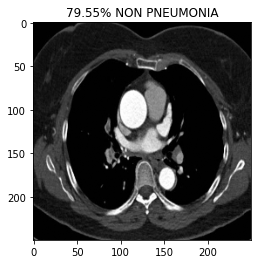

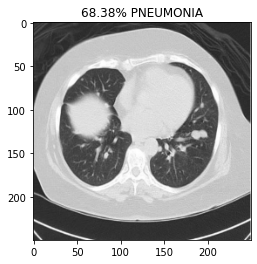

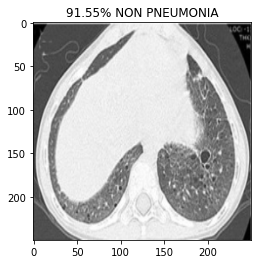

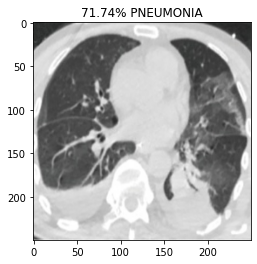

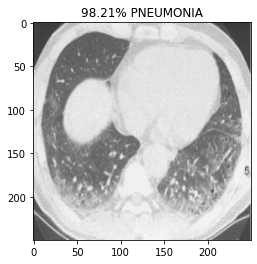

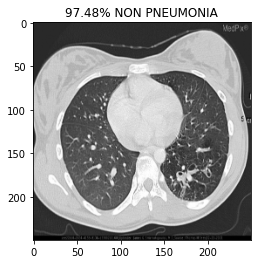

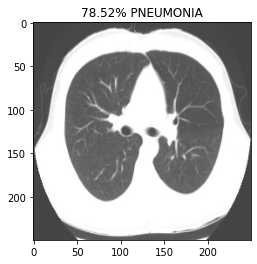

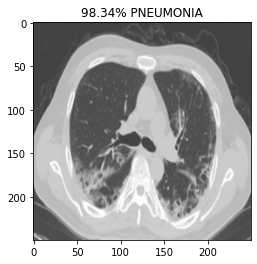

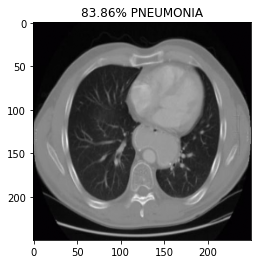

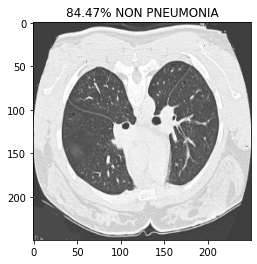

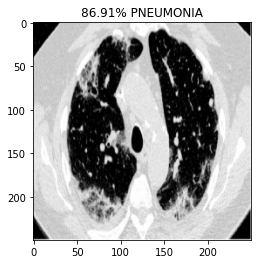

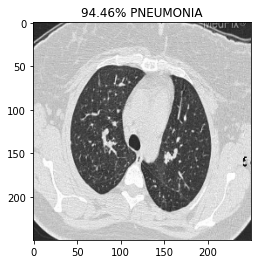

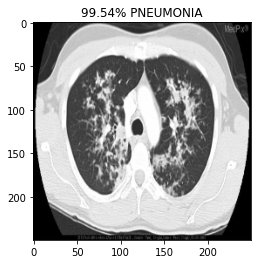

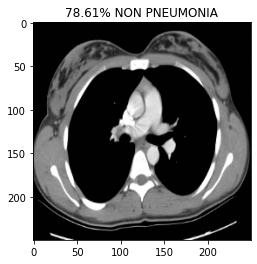

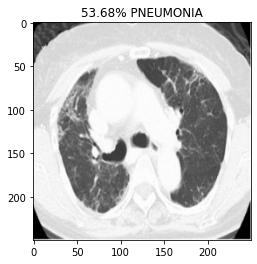

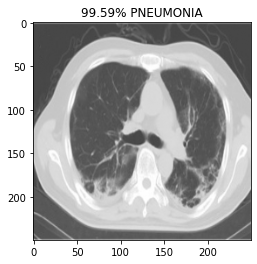

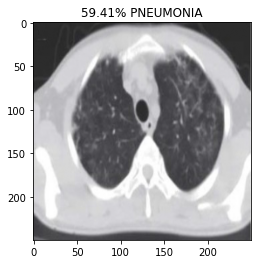

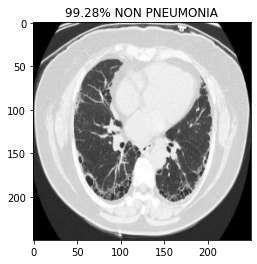

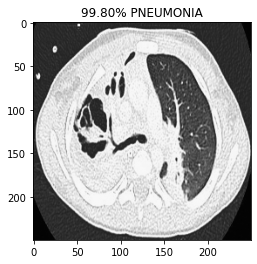

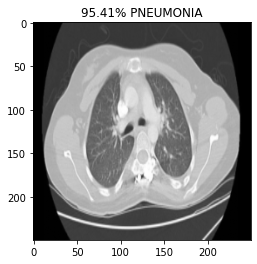

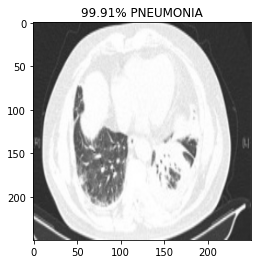

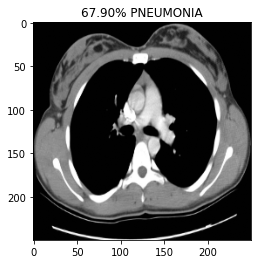

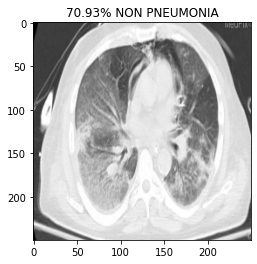

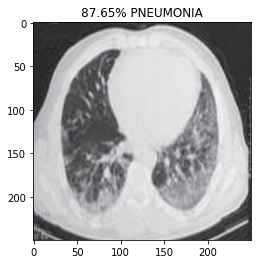

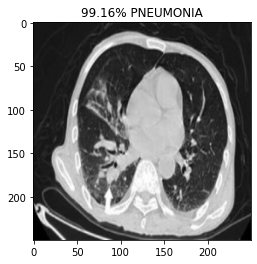

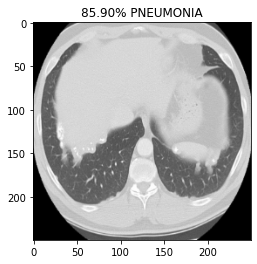

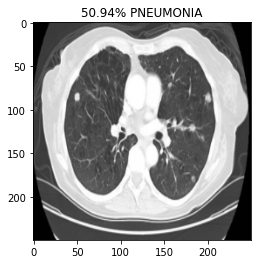

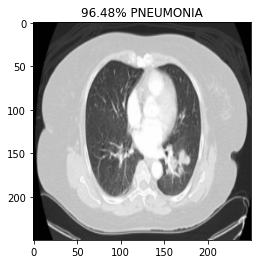

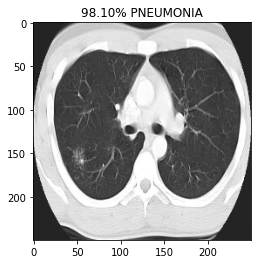

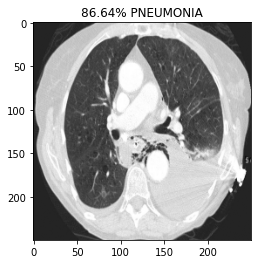

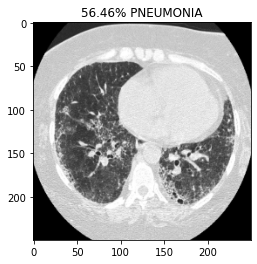

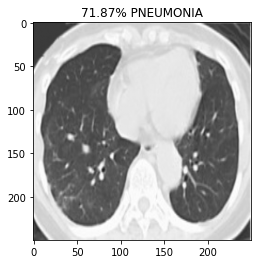

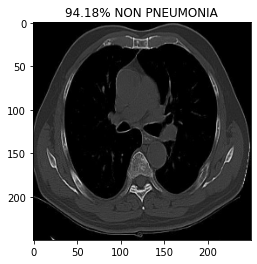

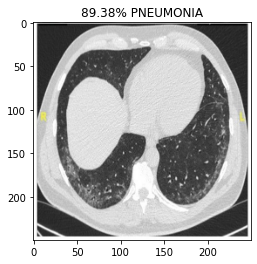

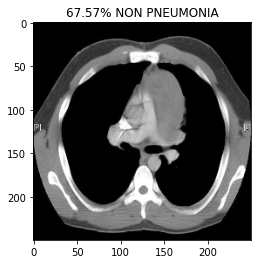

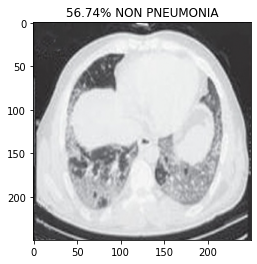

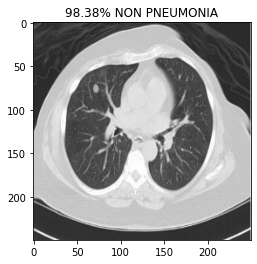

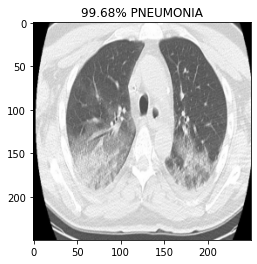

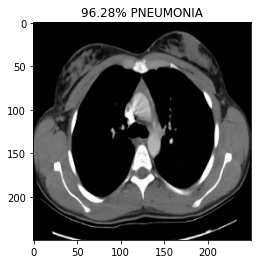

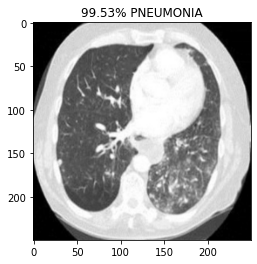

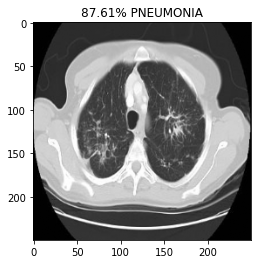

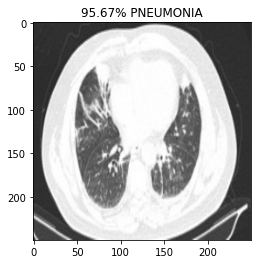

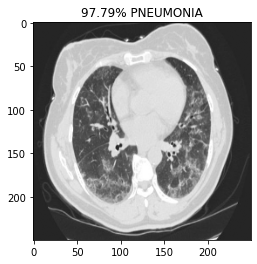

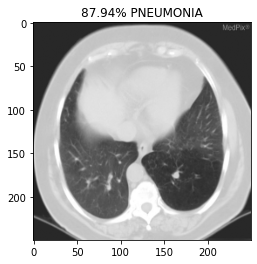

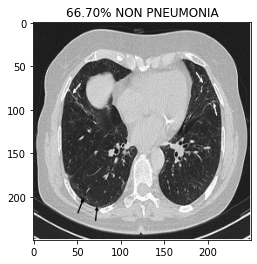

In [22]:
# Load saved model
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

model = load_model("ct model.h5")
y_pred = model.predict(X_test, batch_size=batch_size)

#Let's Look the 1 to 50 images#

prediction=y_pred[1:50]
for index, probability in enumerate(prediction):
  if probability[1] > 0.5:
        plt.title('%.2f' % (probability[1]*100) + '% PNEUMONIA')
  else:
        plt.title('%.2f' % ((1-probability[1])*100) + '% NON PNEUMONIA')
  plt.imshow(X_test[index])
  plt.show()

In [23]:
!pip install scikit-image

In [24]:

# First try on random positive image Let's see how algorithm works.

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import tensorflow as tf
import numpy as np
import random
!pip install scikit-image
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import sys
from PIL import Image

successive_outputs = [layer.output for layer in model.layers[1:]]

visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

In [ ]:
!pip install scikit-image

In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2
from skimage.transform import resize

In [26]:
def detect(frame):
    try:
        img = resize(frame, (250,250))
        img = np.expand_dims(img, axis=0)
        prediction = model.predict(img)
        print(prediction)
        prediction = prediction > 0.5
        print(prediction)
        s = "PNEUMONIA" if (prediction[0][0]) else "Non Pneumonia"
        return (s)
    except AttributeError:
        print("SHAPE NOT FOUND")

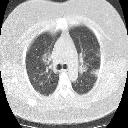

In [36]:
image.load_img("covid.png",target_size = (128,128))

In [37]:

frame = cv2.imread("covid.png")
data = detect(frame)
data


[[0.9778381 0.0221619]]
[[ True False]]


'PNEUMONIA'

[[0.9734937  0.02650632]]


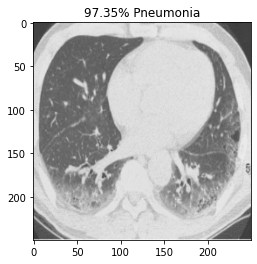

In [38]:
# First try on random positive image Let's see how algorithm works.

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import tensorflow as tf
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import sys
from PIL import Image

successive_outputs = [layer.output for layer in model.layers[1:]]

visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

img  = cv2.imread("covid.png")
img  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)      # arrange format as per deep learning libraries
img  = cv2.resize(img,(250,250))                 # resize as per model

x = img_to_array(img)  # Numpy array with shape (250, 250, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 250, 250, 3)

# Rescale by 1/255 
x /= 255

# Make prediction
successive_feature_maps = model.predict(x)
print(successive_feature_maps)

for index, probability in enumerate(successive_feature_maps):
  if probability[1] > 0.5:
        plt.title('%.2f' % (probability[1]*100) + '% NonPneumonia')
  else:
        plt.title('%.2f' % ((1-probability[1])*100) + '% Pneumonia')
  plt.imshow(X_test[index])
  plt.show()

In [ ]:
import tensorflow as tf

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)